In [1]:
import  json
import requests
import pandas as pd
import numpy as np
import os,shutil

## code to break out law type in map

In [2]:
f = open("map.txt", "r")
content = f.read()
content

"1 -> Administrative Law\n2 -> Admiralty\n3 -> Agriculture\n4 -> Antitrust &amp; Trade Regulation\n5 -> Attorney's Fees\n6 -> Banking Law\n7 -> Bankruptcy Law\n8 -> Civil Procedure\n9 -> Civil Rights\n10 -> Class Actions\n11 -> Commercial Law\n12 -> Communications Law\n13 -> Constitutional Law\n14 -> Construction\n15 -> Consumer Protection Law\n16 -> Contracts\n17 -> Corp. Governance\n18 -> Corporation &amp; Enterprise Law\n19 -> Criminal Law &amp; Procedure\n20 -> Habeas Corpus\n21 -> Sentencing\n22 -> Cyberspace Law\n23 -> Debt Collection\n24 -> Dispute Resolution &amp; Arbitration\n25 -> Drugs &amp; Biotech\n31 -> ERISA\n26 -> Education Law\n27 -> Elder Law\n28 -> Elections\n29 -> Entertainment Law\n30 -> Environmental Law\n32 -> Ethics &amp; Disciplinary Code\n33 -> Ethics &amp; Professional Responsibility\n34 -> Evidence\n35 -> False Advertising\n36 -> Family Law\n37 -> Gaming Law\n38 -> Government Benefits\n39 -> Government Contracts\n40 -> Government Law\n41 -> Health Law\n42 ->

In [3]:
lawcat=content.splitlines()
f.close()
lawcat

['1 -> Administrative Law',
 '2 -> Admiralty',
 '3 -> Agriculture',
 '4 -> Antitrust &amp; Trade Regulation',
 "5 -> Attorney's Fees",
 '6 -> Banking Law',
 '7 -> Bankruptcy Law',
 '8 -> Civil Procedure',
 '9 -> Civil Rights',
 '10 -> Class Actions',
 '11 -> Commercial Law',
 '12 -> Communications Law',
 '13 -> Constitutional Law',
 '14 -> Construction',
 '15 -> Consumer Protection Law',
 '16 -> Contracts',
 '17 -> Corp. Governance',
 '18 -> Corporation &amp; Enterprise Law',
 '19 -> Criminal Law &amp; Procedure',
 '20 -> Habeas Corpus',
 '21 -> Sentencing',
 '22 -> Cyberspace Law',
 '23 -> Debt Collection',
 '24 -> Dispute Resolution &amp; Arbitration',
 '25 -> Drugs &amp; Biotech',
 '31 -> ERISA',
 '26 -> Education Law',
 '27 -> Elder Law',
 '28 -> Elections',
 '29 -> Entertainment Law',
 '30 -> Environmental Law',
 '32 -> Ethics &amp; Disciplinary Code',
 '33 -> Ethics &amp; Professional Responsibility',
 '34 -> Evidence',
 '35 -> False Advertising',
 '36 -> Family Law',
 '37 -> Gam

In [4]:
catagories=[]
for itemset in lawcat:
    meepset=itemset.partition('->')
    print(meepset)
    print(meepset[2])
    catagories.append(meepset)

('1 ', '->', ' Administrative Law')
 Administrative Law
('2 ', '->', ' Admiralty')
 Admiralty
('3 ', '->', ' Agriculture')
 Agriculture
('4 ', '->', ' Antitrust &amp; Trade Regulation')
 Antitrust &amp; Trade Regulation
('5 ', '->', " Attorney's Fees")
 Attorney's Fees
('6 ', '->', ' Banking Law')
 Banking Law
('7 ', '->', ' Bankruptcy Law')
 Bankruptcy Law
('8 ', '->', ' Civil Procedure')
 Civil Procedure
('9 ', '->', ' Civil Rights')
 Civil Rights
('10 ', '->', ' Class Actions')
 Class Actions
('11 ', '->', ' Commercial Law')
 Commercial Law
('12 ', '->', ' Communications Law')
 Communications Law
('13 ', '->', ' Constitutional Law')
 Constitutional Law
('14 ', '->', ' Construction')
 Construction
('15 ', '->', ' Consumer Protection Law')
 Consumer Protection Law
('16 ', '->', ' Contracts')
 Contracts
('17 ', '->', ' Corp. Governance')
 Corp. Governance
('18 ', '->', ' Corporation &amp; Enterprise Law')
 Corporation &amp; Enterprise Law
('19 ', '->', ' Criminal Law &amp; Procedure')


In [5]:
catagories

[('1 ', '->', ' Administrative Law'),
 ('2 ', '->', ' Admiralty'),
 ('3 ', '->', ' Agriculture'),
 ('4 ', '->', ' Antitrust &amp; Trade Regulation'),
 ('5 ', '->', " Attorney's Fees"),
 ('6 ', '->', ' Banking Law'),
 ('7 ', '->', ' Bankruptcy Law'),
 ('8 ', '->', ' Civil Procedure'),
 ('9 ', '->', ' Civil Rights'),
 ('10 ', '->', ' Class Actions'),
 ('11 ', '->', ' Commercial Law'),
 ('12 ', '->', ' Communications Law'),
 ('13 ', '->', ' Constitutional Law'),
 ('14 ', '->', ' Construction'),
 ('15 ', '->', ' Consumer Protection Law'),
 ('16 ', '->', ' Contracts'),
 ('17 ', '->', ' Corp. Governance'),
 ('18 ', '->', ' Corporation &amp; Enterprise Law'),
 ('19 ', '->', ' Criminal Law &amp; Procedure'),
 ('20 ', '->', ' Habeas Corpus'),
 ('21 ', '->', ' Sentencing'),
 ('22 ', '->', ' Cyberspace Law'),
 ('23 ', '->', ' Debt Collection'),
 ('24 ', '->', ' Dispute Resolution &amp; Arbitration'),
 ('25 ', '->', ' Drugs &amp; Biotech'),
 ('31 ', '->', ' ERISA'),
 ('26 ', '->', ' Education Law'

In [6]:
data=pd.DataFrame(columns=['case_text','case_type'])

In [7]:
main_directory=os.getcwd()

pathToText='raw_cases\\raw_cases'

In [8]:
path=os.path.join(main_directory,pathToText)

In [9]:
masterpath=os.listdir(path)

In [11]:
counterfordocuments=1

for folder in masterpath[:-1]:
    subfile=os.listdir(os.path.join(path,folder))
    for rawtext in subfile:
        with open(os.path.join(path,folder)+'/' +rawtext,'r',encoding='utf-8') as f:
            content=f.read()
            vardict=pd.DataFrame({'case_text':content,'case_type':folder},index=[counterfordocuments])
            data=data.append(vardict)
            counterfordocuments+= 1

# remap numbers to text

In [12]:
law_cat_map={}
for item in catagories:
    law_cat_map[item[0].strip()]=item[2]

In [13]:
law_cat_map

{'1': ' Administrative Law',
 '2': ' Admiralty',
 '3': ' Agriculture',
 '4': ' Antitrust &amp; Trade Regulation',
 '5': " Attorney's Fees",
 '6': ' Banking Law',
 '7': ' Bankruptcy Law',
 '8': ' Civil Procedure',
 '9': ' Civil Rights',
 '10': ' Class Actions',
 '11': ' Commercial Law',
 '12': ' Communications Law',
 '13': ' Constitutional Law',
 '14': ' Construction',
 '15': ' Consumer Protection Law',
 '16': ' Contracts',
 '17': ' Corp. Governance',
 '18': ' Corporation &amp; Enterprise Law',
 '19': ' Criminal Law &amp; Procedure',
 '20': ' Habeas Corpus',
 '21': ' Sentencing',
 '22': ' Cyberspace Law',
 '23': ' Debt Collection',
 '24': ' Dispute Resolution &amp; Arbitration',
 '25': ' Drugs &amp; Biotech',
 '31': ' ERISA',
 '26': ' Education Law',
 '27': ' Elder Law',
 '28': ' Elections',
 '29': ' Entertainment Law',
 '30': ' Environmental Law',
 '32': ' Ethics &amp; Disciplinary Code',
 '33': ' Ethics &amp; Professional Responsibility',
 '34': ' Evidence',
 '35': ' False Advertising

In [14]:
law_type_df=data.replace({'case_type':law_cat_map})


In [22]:
law_type_df.groupby(['case_type']).count().sort_values(by=['case_text'],ascending=False)

,case_text
case_type,
Habeas Corpus,3022
Immigration Law,2332
Contracts,2118
Administrative Law,2106
Sentencing,2064
...,...
Tax-exempt Organizations,74
Judges &amp; Judiciary,65
Legal Malpractice,61


<AxesSubplot:ylabel='case_type'>

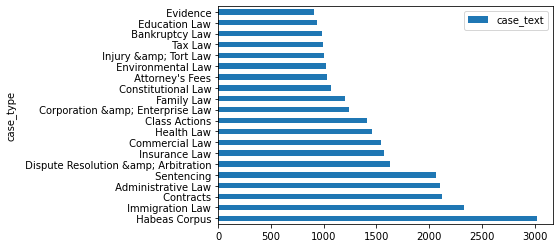

In [25]:
law_type_df.groupby(['case_type']).count().sort_values(by=['case_text'],ascending=False)[0:20].plot(kind='barh')

In [29]:
forcasename=law_type_df.groupby(['case_type']).count().sort_values(by=['case_text'],ascending=False)[0:20]

In [36]:
caselist20=list(forcasename.index)

In [45]:
data_frame20=pd.DataFrame(columns=['case_text','case_type'])
for casetype in caselist20:
    tempval=law_type_df[law_type_df.case_type==casetype]
    data_frame20=data_frame20.append(tempval)




In [46]:
data_frame20

,case_text,case_type
6549,Per Curiam.\n The Antiterrorism and E...,Habeas Corpus
6550,Petitioner Kevan Brumfield was convicted of mu...,Habeas Corpus
6551,David Collins was tried and convicted in Massa...,Habeas Corpus
6552,OPINION\nAppellant Raymond Dayle Rowsey was co...,Habeas Corpus
6553,OPINION\nA South Carolina jury convicted Willi...,Habeas Corpus
...,...,...
15939,Defendant Horatio Hamilton appeals from the ju...,Evidence
15940,Defendant appeals from a judgment of convictio...,Evidence
15941,Defendant-appellant (“defendant”) appeals from...,Evidence
15942,Harold Klump appeals from a judgment of convic...,Evidence


# check point

In [49]:
data_frame20.case_type.value_counts()

 Habeas Corpus                           3022
 Immigration Law                         2332
 Contracts                               2118
 Administrative Law                      2106
 Sentencing                              2064
 Dispute Resolution &amp; Arbitration    1632
 Insurance Law                           1569
 Commercial Law                          1542
 Health Law                              1455
 Class Actions                           1410
 Corporation &amp; Enterprise Law        1242
 Family Law                              1203
 Constitutional Law                      1068
 Attorney's Fees                         1034
 Environmental Law                       1024
 Injury &amp; Tort Law                   1000
 Tax Law                                  991
 Bankruptcy Law                           988
 Education Law                            936
 Evidence                                 912
Name: case_type, dtype: int64

In [51]:
for classcount in data_frame20.case_type.value_counts():
    print(classcount)

3022
2332
2118
2106
2064
1632
1569
1542
1455
1410
1242
1203
1068
1034
1024
1000
991
988
936
912


In [52]:
textdata=data_frame20['case_text']
target = data_frame20['case_type']

In [53]:
textdata

6549          Per Curiam.\n     The Antiterrorism and E...
6550     Petitioner Kevan Brumfield was convicted of mu...
6551     David Collins was tried and convicted in Massa...
6552     OPINION\nAppellant Raymond Dayle Rowsey was co...
6553     OPINION\nA South Carolina jury convicted Willi...
                               ...                        
15939    Defendant Horatio Hamilton appeals from the ju...
15940    Defendant appeals from a judgment of convictio...
15941    Defendant-appellant (“defendant”) appeals from...
15942    Harold Klump appeals from a judgment of convic...
15943    Defendant-appellee Francisco Rodriguez was arr...
Name: case_text, Length: 29648, dtype: object

In [20]:
data.head()

,case_text,case_type
1,Petitioner Jhonatan Acosta (“Acosta”) petition...,1
2,OPINION\nAnthony Araujo filed a complaint in t...,1
3,OPINION\nRobert Zimmerman was riding his motor...,1
4,OPINION\nThis case returns to us after the Sup...,1
5,"OPINION OF THE COURT\nHaddrick Byrd, a prisone...",1


# break up for relevant information

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_frame20['case_text'])

text_tf_tfigf=pd.DataFrame(text_tf.todense(),columns = tf.get_feature_names())

In [60]:
text_tf_tfigf

,00,000,0000,000000,000000000001,0000000000564,0000000010,0000001,0000006000,0000006740,...,ìg,ñaña,ñeta,ñetas,ñxå7åæå37,über,übermensch,μg,μm,μs
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012008,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.021960,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29643,0.000000,0.013937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29644,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29645,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29646,0.000000,0.017409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
relevant = pd.DataFrame()
for word in text_tf_tfigf.columns:
    if text_tf_tfigf[word].mean() > 0.0001:
        relevant[word]=text_tf_tfigf[word]
len(relevant)

29648

In [72]:
relevant

,00,000,001,002,003,01,010,02,020,03,...,zheng,zhou,zhu,zimmer,zimmerman,zip,zone,zones,zoning,zurich
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.005327,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012008,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.021960,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29643,0.000000,0.013937,0.0,0.0,0.0,0.003197,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29644,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29645,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29646,0.000000,0.017409,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
trans_relevant=relevant.T

In [83]:
relevant.mean().sort_values(ascending=False)

the            0.379506
of             0.173533
to             0.148610
that           0.106559
and            0.098589
                 ...   
misbehavior    0.000100
2t1            0.000100
blacks         0.000100
henkel         0.000100
1740           0.000100
Length: 12832, dtype: float64

In [105]:
relevant.mean().sort_values(ascending=False).reset_index()

,index,0
0,the,0.379506
1,of,0.173533
2,to,0.148610
3,that,0.106559
4,and,0.098589
...,...,...
12827,misbehavior,0.000100
12828,2t1,0.000100
12829,blacks,0.000100
12830,henkel,0.000100


In [119]:
valtrue=relevant.mean().sort_values(ascending=False).reset_index()
valtrue

,index,0
0,the,0.379506
1,of,0.173533
2,to,0.148610
3,that,0.106559
4,and,0.098589
...,...,...
12827,misbehavior,0.000100
12828,2t1,0.000100
12829,blacks,0.000100
12830,henkel,0.000100


In [191]:
relevant_words_trans_sort_for_plot=pd.DataFrame(columns=valtrue['index'])
relevant_words_trans_sort_for_plot

index,the,of,to,that,and,in,court,for,is,not,...,lamb,tar,obstructed,sublease,numbered,misbehavior,2t1,blacks,henkel,1740


In [192]:
valtrue.loc[18][1:2][0]

0.024670017590198927

In [199]:
relevant_words_trans_sort_for_plot=relevant_words_trans_sort_for_plot.T

In [208]:
relevant_words_trans_sort_for_plot['mean']=0

In [205]:
relevant_words_trans_sort_for_plot.iloc[1]

In [209]:
relevant_words_trans_sort_for_plot

,mean
index,
the,0
of,0
to,0
that,0
and,0
...,...
misbehavior,0
2t1,0
blacks,0


In [210]:
for inde,word in enumerate(valtrue['index']):
    relevant_words_trans_sort_for_plot.iloc[inde]=valtrue.loc[inde][1:2][0]

<AxesSubplot:ylabel='index'>

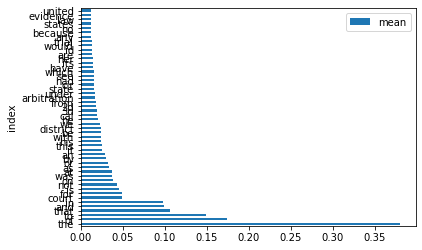

In [228]:
relevant_words_trans_sort_for_plot[0:50].plot(kind='barh')

# create function to do this when i need.

In [230]:
def common_words_charts(frame):
    new_frame=frame.mean().sort_values(ascending=False).reset_index()
    for_plot_in_func=pd.DataFrame(columns=new_frame['index'])
    for_plot_in_func['mean']=0
    
    for inde,word in enumerate(for_plot_in_func['index']):
        relevant_words_trans_sort_for_plot.iloc[inde]=for_plot_in_func.loc[inde][1:2][0]
        
    relevant_words_trans_sort_for_plot[0:50].plot(kind='barh')

# most common word by legal catagory

this is the dataframe from earlier in code to use data_frame20

In [235]:
data_frame20['case_type'].unique()

array([' Habeas Corpus', ' Immigration Law', ' Contracts',
       ' Administrative Law', ' Sentencing',
       ' Dispute Resolution &amp; Arbitration', ' Insurance Law',
       ' Commercial Law', ' Health Law', ' Class Actions',
       ' Corporation &amp; Enterprise Law', ' Family Law',
       ' Constitutional Law', " Attorney's Fees", ' Environmental Law',
       ' Injury &amp; Tort Law', ' Tax Law', ' Bankruptcy Law',
       ' Education Law', ' Evidence'], dtype=object)

# end of EDA